## Importing libraries

In [1]:
!pip install paddlepaddle paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.7 MB/s eta 0:00:00:00:01
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=f2a868425a9ebb326411da2f857d83806fff09d1d9ec70ce92a1c068ca83655c
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [5]:
!pip install ipython-autotime
%load_ext autotime

time: 286 µs (started: 2024-09-13 21:22:00 +00:00)


In [11]:
import requests
import os
import cv2
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
import pandas as pd
from tqdm import tqdm

time: 817 µs (started: 2024-09-13 21:23:27 +00:00)


## Loading dataset

In [12]:
dataset = pd.read_csv('/kaggle/input/amazonml/train.csv')
dataset

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram
...,...,...,...,...
263854,https://m.media-amazon.com/images/I/612J1R1xHl...,558806,height,5.0 centimetre
263855,https://m.media-amazon.com/images/I/61Blzh2+28...,470067,height,8.5 inch
263856,https://m.media-amazon.com/images/I/51MsegDL9V...,204245,height,43.2 centimetre
263857,https://m.media-amazon.com/images/I/510KhVw4VS...,752266,height,9.1 centimetre


time: 385 ms (started: 2024-09-13 21:23:30 +00:00)


## Loading OCR

In [13]:
def save_ocr(img_url, out_path, result, font_path=None):
    # Download the image from the URL
    response = requests.get(img_url)
    image = Image.open(BytesIO(response.content))

    # Convert the image to OpenCV format (numpy array)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Extract boxes, text, and scores from the result
    boxes = [res[0] for res in result[0]]
    txts = [res[1][0] for res in result[0]]
    scores = [res[1][1] for res in result[0]]

    # Use the provided font path, or fall back to a default font
    try:
        font = ImageFont.truetype(font_path, 20) if font_path else ImageFont.load_default()
    except IOError:
        print("Font file not found. Using default font.")
        font = ImageFont.load_default()

    # Draw the OCR results on the image
    im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)

    # Convert the result back to PIL format
    im_show = Image.fromarray(im_show)

    # Save the image with OCR annotations
    im_show.save(out_path)

    # Display the image
    plt.imshow(im_show)
    plt.axis('off')
    plt.show()

time: 2.15 ms (started: 2024-09-13 21:23:32 +00:00)


In [14]:
# Initialize OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2024/09/13 21:23:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [20]:
result = ocr.ocr(dataset['image_link'][52])
print(result)

[2024/09/13 21:33:05] ppocr INFO: Path tmp.jpg already exists. Skipping...
[2024/09/13 21:33:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.2315506935119629
[2024/09/13 21:33:06] ppocr DEBUG: cls num  : 1, elapsed : 0.012788057327270508
[2024/09/13 21:33:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.05665993690490723
[None]
time: 329 ms (started: 2024-09-13 21:33:05 +00:00)


In [22]:
final_extract = []
for i in tqdm(range(len(dataset[:100]))):
    img_url = dataset['image_link'][i]
    result = ocr.ocr(img_url)
    if result != [None]:
        text_confidence_list = [(res[1][0], res[1][1]) for res in result[0]]
    else:
        text_confidence_list = []
    final_extract.append(text_confidence_list)
    

    # Remove the temporary 'tmp.jpg' file
    tmp_file = 'tmp.jpg'  # Path to the temporary file
    if os.path.exists(tmp_file):
        os.remove(tmp_file)

  0%|          | 0/100 [00:00<?, ?it/s]
100%|██████████| 84.0k/84.0k [00:00<00:00, 7.33MiB/s]


[2024/09/13 21:34:05] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.3028402328491211
[2024/09/13 21:34:05] ppocr DEBUG: cls num  : 18, elapsed : 0.059610843658447266
[2024/09/13 21:34:07] ppocr DEBUG: rec_res num  : 18, elapsed : 1.5955650806427002


  1%|          | 1/100 [00:02<03:27,  2.09s/it]
100%|██████████| 184k/184k [00:00<00:00, 7.92MiB/s]


[2024/09/13 21:34:07] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.24193406105041504
[2024/09/13 21:34:07] ppocr DEBUG: cls num  : 17, elapsed : 0.0713338851928711
[2024/09/13 21:34:08] ppocr DEBUG: rec_res num  : 17, elapsed : 0.9259109497070312


  2%|▏         | 2/100 [00:03<02:43,  1.67s/it]
100%|██████████| 96.1k/96.1k [00:00<00:00, 6.61MiB/s]


[2024/09/13 21:34:09] ppocr DEBUG: dt_boxes num : 53, elapsed : 0.255232572555542
[2024/09/13 21:34:09] ppocr DEBUG: cls num  : 53, elapsed : 0.11569929122924805
[2024/09/13 21:34:12] ppocr DEBUG: rec_res num  : 53, elapsed : 3.1105120182037354


  3%|▎         | 3/100 [00:07<04:07,  2.55s/it]
100%|██████████| 72.4k/72.4k [00:00<00:00, 6.54MiB/s]


[2024/09/13 21:34:12] ppocr DEBUG: dt_boxes num : 44, elapsed : 0.24586009979248047
[2024/09/13 21:34:12] ppocr DEBUG: cls num  : 44, elapsed : 0.12601804733276367
[2024/09/13 21:34:15] ppocr DEBUG: rec_res num  : 44, elapsed : 2.692784070968628


  4%|▍         | 4/100 [00:10<04:27,  2.78s/it]
100%|██████████| 81.7k/81.7k [00:00<00:00, 6.30MiB/s]


[2024/09/13 21:34:15] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.2424459457397461
[2024/09/13 21:34:15] ppocr DEBUG: cls num  : 13, elapsed : 0.06358814239501953
[2024/09/13 21:34:16] ppocr DEBUG: rec_res num  : 13, elapsed : 0.5880129337310791


  5%|▌         | 5/100 [00:11<03:22,  2.13s/it]
100%|██████████| 131k/131k [00:00<00:00, 6.36MiB/s]


[2024/09/13 21:34:16] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.2550678253173828
[2024/09/13 21:34:16] ppocr DEBUG: cls num  : 17, elapsed : 0.06790590286254883
[2024/09/13 21:34:17] ppocr DEBUG: rec_res num  : 17, elapsed : 0.9023494720458984


  6%|▌         | 6/100 [00:12<02:54,  1.85s/it]
100%|██████████| 411k/411k [00:00<00:00, 15.7MiB/s]


[2024/09/13 21:34:18] ppocr DEBUG: dt_boxes num : 37, elapsed : 0.2490391731262207
[2024/09/13 21:34:18] ppocr DEBUG: cls num  : 37, elapsed : 0.09125995635986328
[2024/09/13 21:34:21] ppocr DEBUG: rec_res num  : 37, elapsed : 2.864621877670288


  7%|▋         | 7/100 [00:15<03:38,  2.35s/it]
100%|██████████| 138k/138k [00:00<00:00, 6.29MiB/s]


[2024/09/13 21:34:21] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.252697229385376
[2024/09/13 21:34:21] ppocr DEBUG: cls num  : 23, elapsed : 0.07751250267028809
[2024/09/13 21:34:22] ppocr DEBUG: rec_res num  : 23, elapsed : 0.9421920776367188


  8%|▊         | 8/100 [00:17<03:07,  2.03s/it]
100%|██████████| 583k/583k [00:00<00:00, 17.4MiB/s]


[2024/09/13 21:34:22] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.24363160133361816
[2024/09/13 21:34:22] ppocr DEBUG: cls num  : 24, elapsed : 0.05480027198791504
[2024/09/13 21:34:23] ppocr DEBUG: rec_res num  : 24, elapsed : 0.9600458145141602


  9%|▉         | 9/100 [00:18<02:47,  1.84s/it]
100%|██████████| 161k/161k [00:00<00:00, 7.20MiB/s]


[2024/09/13 21:34:24] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.2324380874633789
[2024/09/13 21:34:24] ppocr DEBUG: cls num  : 30, elapsed : 0.0625302791595459
[2024/09/13 21:34:25] ppocr DEBUG: rec_res num  : 30, elapsed : 1.3429205417633057


 10%|█         | 10/100 [00:20<02:42,  1.81s/it]
100%|██████████| 478k/478k [00:00<00:00, 8.61MiB/s]


[2024/09/13 21:34:25] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.22639250755310059
[2024/09/13 21:34:26] ppocr DEBUG: cls num  : 7, elapsed : 0.0495753288269043
[2024/09/13 21:34:27] ppocr DEBUG: rec_res num  : 7, elapsed : 1.48781418800354


 11%|█         | 11/100 [00:22<02:43,  1.84s/it]
100%|██████████| 68.0k/68.0k [00:00<00:00, 7.34MiB/s]


[2024/09/13 21:34:27] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.23466801643371582
[2024/09/13 21:34:27] ppocr DEBUG: cls num  : 21, elapsed : 0.07735013961791992
[2024/09/13 21:34:28] ppocr DEBUG: rec_res num  : 21, elapsed : 0.7412915229797363


 12%|█▏        | 12/100 [00:23<02:22,  1.62s/it]
100%|██████████| 589k/589k [00:00<00:00, 8.00MiB/s]


[2024/09/13 21:34:29] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.24535727500915527
[2024/09/13 21:34:29] ppocr DEBUG: cls num  : 31, elapsed : 0.07586526870727539
[2024/09/13 21:34:30] ppocr DEBUG: rec_res num  : 31, elapsed : 1.1832337379455566


 13%|█▎        | 13/100 [00:25<02:25,  1.67s/it]
100%|██████████| 283k/283k [00:00<00:00, 11.8MiB/s]


[2024/09/13 21:34:30] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.2385094165802002
[2024/09/13 21:34:30] ppocr DEBUG: cls num  : 19, elapsed : 0.05550813674926758
[2024/09/13 21:34:31] ppocr DEBUG: rec_res num  : 19, elapsed : 1.0538771152496338


 14%|█▍        | 14/100 [00:26<02:18,  1.61s/it]
100%|██████████| 418k/418k [00:00<00:00, 11.2MiB/s]


[2024/09/13 21:34:32] ppocr DEBUG: dt_boxes num : 62, elapsed : 0.2623608112335205
[2024/09/13 21:34:32] ppocr DEBUG: cls num  : 62, elapsed : 0.1567974090576172
[2024/09/13 21:34:34] ppocr DEBUG: rec_res num  : 62, elapsed : 2.4655420780181885


 15%|█▌        | 15/100 [00:29<02:53,  2.05s/it]
100%|██████████| 562k/562k [00:00<00:00, 13.2MiB/s]


[2024/09/13 21:34:35] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.23320674896240234
[2024/09/13 21:34:35] ppocr DEBUG: cls num  : 24, elapsed : 0.058028221130371094
[2024/09/13 21:34:36] ppocr DEBUG: rec_res num  : 24, elapsed : 1.1276161670684814


 16%|█▌        | 16/100 [00:31<02:40,  1.91s/it]
100%|██████████| 453k/453k [00:00<00:00, 11.7MiB/s]


[2024/09/13 21:34:36] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.20562100410461426
[2024/09/13 21:34:36] ppocr DEBUG: cls num  : 9, elapsed : 0.05035853385925293
[2024/09/13 21:34:37] ppocr DEBUG: rec_res num  : 9, elapsed : 0.3466935157775879


 17%|█▋        | 17/100 [00:32<02:08,  1.55s/it]
100%|██████████| 470k/470k [00:00<00:00, 15.9MiB/s]


[2024/09/13 21:34:37] ppocr DEBUG: dt_boxes num : 37, elapsed : 0.13391828536987305
[2024/09/13 21:34:37] ppocr DEBUG: cls num  : 37, elapsed : 0.11065673828125
[2024/09/13 21:34:39] ppocr DEBUG: rec_res num  : 37, elapsed : 2.0326852798461914


 18%|█▊        | 18/100 [00:34<02:29,  1.82s/it]
100%|██████████| 411k/411k [00:00<00:00, 20.0MiB/s]


[2024/09/13 21:34:39] ppocr DEBUG: dt_boxes num : 46, elapsed : 0.19309759140014648
[2024/09/13 21:34:40] ppocr DEBUG: cls num  : 46, elapsed : 0.12738347053527832
[2024/09/13 21:34:42] ppocr DEBUG: rec_res num  : 46, elapsed : 2.0820889472961426


 19%|█▉        | 19/100 [00:36<02:43,  2.02s/it]
100%|██████████| 721k/721k [00:00<00:00, 19.9MiB/s]


[2024/09/13 21:34:42] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.38103747367858887
[2024/09/13 21:34:42] ppocr DEBUG: cls num  : 20, elapsed : 0.07951235771179199
[2024/09/13 21:34:43] ppocr DEBUG: rec_res num  : 20, elapsed : 0.7401893138885498


 20%|██        | 20/100 [00:38<02:25,  1.82s/it]
100%|██████████| 14.0k/14.0k [00:00<00:00, 12.2MiB/s]

[2024/09/13 21:34:43] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.1239004135131836
[2024/09/13 21:34:43] ppocr DEBUG: cls num  : 4, elapsed : 0.016885995864868164


[2024/09/13 21:34:43] ppocr DEBUG: rec_res num  : 4, elapsed : 0.17912006378173828


 21%|██        | 21/100 [00:38<01:49,  1.38s/it]
100%|██████████| 110k/110k [00:00<00:00, 6.11MiB/s]


[2024/09/13 21:34:44] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.3243112564086914
[2024/09/13 21:34:44] ppocr DEBUG: cls num  : 15, elapsed : 0.06262397766113281
[2024/09/13 21:34:45] ppocr DEBUG: rec_res num  : 15, elapsed : 0.9257018566131592


 22%|██▏       | 22/100 [00:40<01:48,  1.39s/it]
100%|██████████| 89.2k/89.2k [00:00<00:00, 7.87MiB/s]


[2024/09/13 21:34:45] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.22749090194702148
[2024/09/13 21:34:45] ppocr DEBUG: cls num  : 12, elapsed : 0.030829906463623047
[2024/09/13 21:34:46] ppocr DEBUG: rec_res num  : 12, elapsed : 1.1421887874603271


 23%|██▎       | 23/100 [00:41<01:48,  1.41s/it]
100%|██████████| 375k/375k [00:00<00:00, 11.6MiB/s]


[2024/09/13 21:34:47] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.23073434829711914
[2024/09/13 21:34:47] ppocr DEBUG: cls num  : 20, elapsed : 0.07397317886352539
[2024/09/13 21:34:48] ppocr DEBUG: rec_res num  : 20, elapsed : 0.8908579349517822


 24%|██▍       | 24/100 [00:42<01:45,  1.39s/it]
100%|██████████| 175k/175k [00:00<00:00, 7.90MiB/s]


[2024/09/13 21:34:48] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.2451341152191162
[2024/09/13 21:34:48] ppocr DEBUG: cls num  : 25, elapsed : 0.08851957321166992
[2024/09/13 21:34:49] ppocr DEBUG: rec_res num  : 25, elapsed : 1.175745964050293


 25%|██▌       | 25/100 [00:44<01:49,  1.45s/it]
100%|██████████| 175k/175k [00:00<00:00, 8.11MiB/s]


[2024/09/13 21:34:50] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.24145746231079102
[2024/09/13 21:34:50] ppocr DEBUG: cls num  : 25, elapsed : 0.0671701431274414
[2024/09/13 21:34:51] ppocr DEBUG: rec_res num  : 25, elapsed : 1.0653157234191895


 26%|██▌       | 26/100 [00:45<01:47,  1.46s/it]
100%|██████████| 48.4k/48.4k [00:00<00:00, 10.4MiB/s]


[2024/09/13 21:34:51] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.24976038932800293
[2024/09/13 21:34:51] ppocr DEBUG: cls num  : 17, elapsed : 0.07124996185302734
[2024/09/13 21:34:52] ppocr DEBUG: rec_res num  : 17, elapsed : 0.739980936050415


 27%|██▋       | 27/100 [00:47<01:38,  1.36s/it]
100%|██████████| 112k/112k [00:00<00:00, 6.03MiB/s]


[2024/09/13 21:34:52] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.2290041446685791
[2024/09/13 21:34:52] ppocr DEBUG: cls num  : 3, elapsed : 0.035755157470703125
[2024/09/13 21:34:52] ppocr DEBUG: rec_res num  : 3, elapsed : 0.14932918548583984


 28%|██▊       | 28/100 [00:47<01:18,  1.09s/it]
100%|██████████| 178k/178k [00:00<00:00, 10.2MiB/s]


[2024/09/13 21:34:53] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.22606253623962402
[2024/09/13 21:34:53] ppocr DEBUG: cls num  : 9, elapsed : 0.032018423080444336
[2024/09/13 21:34:53] ppocr DEBUG: rec_res num  : 9, elapsed : 0.6345391273498535


 29%|██▉       | 29/100 [00:48<01:14,  1.05s/it]
100%|██████████| 101k/101k [00:00<00:00, 7.55MiB/s]


[2024/09/13 21:34:54] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.22340798377990723
[2024/09/13 21:34:54] ppocr DEBUG: cls num  : 14, elapsed : 0.05847740173339844
[2024/09/13 21:34:54] ppocr DEBUG: rec_res num  : 14, elapsed : 0.7310748100280762


 30%|███       | 30/100 [00:49<01:14,  1.07s/it]
100%|██████████| 237k/237k [00:00<00:00, 6.86MiB/s]


[2024/09/13 21:34:55] ppocr DEBUG: dt_boxes num : 46, elapsed : 0.23502516746520996
[2024/09/13 21:34:55] ppocr DEBUG: cls num  : 46, elapsed : 0.11870980262756348
[2024/09/13 21:34:57] ppocr DEBUG: rec_res num  : 46, elapsed : 1.7602064609527588


 31%|███       | 31/100 [00:51<01:38,  1.42s/it]
100%|██████████| 259k/259k [00:00<00:00, 7.34MiB/s]


[2024/09/13 21:34:57] ppocr DEBUG: dt_boxes num : 43, elapsed : 0.2386336326599121
[2024/09/13 21:34:57] ppocr DEBUG: cls num  : 43, elapsed : 0.11670565605163574
[2024/09/13 21:34:59] ppocr DEBUG: rec_res num  : 43, elapsed : 1.7595887184143066


 32%|███▏      | 32/100 [00:54<01:53,  1.67s/it]
100%|██████████| 140k/140k [00:00<00:00, 5.36MiB/s]


[2024/09/13 21:34:59] ppocr DEBUG: dt_boxes num : 26, elapsed : 0.25326967239379883
[2024/09/13 21:34:59] ppocr DEBUG: cls num  : 26, elapsed : 0.09194564819335938
[2024/09/13 21:35:00] ppocr DEBUG: rec_res num  : 26, elapsed : 1.1488425731658936


 33%|███▎      | 33/100 [00:55<01:50,  1.65s/it]
100%|██████████| 158k/158k [00:00<00:00, 6.16MiB/s]


[2024/09/13 21:35:01] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.24720501899719238
[2024/09/13 21:35:01] ppocr DEBUG: cls num  : 20, elapsed : 0.057745933532714844
[2024/09/13 21:35:02] ppocr DEBUG: rec_res num  : 20, elapsed : 0.8947231769561768


 34%|███▍      | 34/100 [00:57<01:42,  1.55s/it]
100%|██████████| 183k/183k [00:00<00:00, 9.38MiB/s]


[2024/09/13 21:35:02] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.23738646507263184
[2024/09/13 21:35:02] ppocr DEBUG: cls num  : 9, elapsed : 0.05226850509643555
[2024/09/13 21:35:03] ppocr DEBUG: rec_res num  : 9, elapsed : 0.3595607280731201


 35%|███▌      | 35/100 [00:57<01:24,  1.30s/it]
100%|██████████| 49.4k/49.4k [00:00<00:00, 11.2MiB/s]


[2024/09/13 21:35:03] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.23546361923217773
[2024/09/13 21:35:03] ppocr DEBUG: cls num  : 7, elapsed : 0.050408124923706055
[2024/09/13 21:35:04] ppocr DEBUG: rec_res num  : 7, elapsed : 0.6503596305847168


 36%|███▌      | 36/100 [00:58<01:17,  1.21s/it]
100%|██████████| 123k/123k [00:00<00:00, 13.1MiB/s]


[2024/09/13 21:35:04] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.22716403007507324
[2024/09/13 21:35:04] ppocr DEBUG: cls num  : 6, elapsed : 0.019046545028686523
[2024/09/13 21:35:04] ppocr DEBUG: rec_res num  : 6, elapsed : 0.6259057521820068


 37%|███▋      | 37/100 [00:59<01:11,  1.13s/it]
100%|██████████| 123k/123k [00:00<00:00, 10.5MiB/s]


[2024/09/13 21:35:05] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.2266693115234375
[2024/09/13 21:35:05] ppocr DEBUG: cls num  : 6, elapsed : 0.01917409896850586
[2024/09/13 21:35:05] ppocr DEBUG: rec_res num  : 6, elapsed : 0.5838255882263184


 38%|███▊      | 38/100 [01:00<01:05,  1.06s/it]
100%|██████████| 150k/150k [00:00<00:00, 12.9MiB/s]


[2024/09/13 21:35:06] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.23300743103027344
[2024/09/13 21:35:06] ppocr DEBUG: cls num  : 19, elapsed : 0.0528714656829834
[2024/09/13 21:35:08] ppocr DEBUG: rec_res num  : 19, elapsed : 2.081185817718506


 39%|███▉      | 39/100 [01:03<01:30,  1.49s/it]
100%|██████████| 646k/646k [00:00<00:00, 27.3MiB/s]


[2024/09/13 21:35:08] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.2348499298095703
[2024/09/13 21:35:08] ppocr DEBUG: cls num  : 9, elapsed : 0.05698442459106445
[2024/09/13 21:35:09] ppocr DEBUG: rec_res num  : 9, elapsed : 0.4530806541442871


 40%|████      | 40/100 [01:03<01:17,  1.30s/it]
100%|██████████| 220k/220k [00:00<00:00, 14.6MiB/s]


[2024/09/13 21:35:09] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.34580540657043457
[2024/09/13 21:35:09] ppocr DEBUG: cls num  : 18, elapsed : 0.04304099082946777
[2024/09/13 21:35:11] ppocr DEBUG: rec_res num  : 18, elapsed : 1.4993181228637695


 41%|████      | 41/100 [01:05<01:28,  1.50s/it]
100%|██████████| 483k/483k [00:00<00:00, 8.71MiB/s]


[2024/09/13 21:35:11] ppocr DEBUG: dt_boxes num : 72, elapsed : 0.23010754585266113
[2024/09/13 21:35:11] ppocr DEBUG: cls num  : 72, elapsed : 0.14623045921325684
[2024/09/13 21:35:16] ppocr DEBUG: rec_res num  : 72, elapsed : 4.522331953048706


 42%|████▏     | 42/100 [01:11<02:29,  2.58s/it]
100%|██████████| 79.9k/79.9k [00:00<00:00, 10.6MiB/s]


[2024/09/13 21:35:16] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.3500237464904785
[2024/09/13 21:35:16] ppocr DEBUG: cls num  : 2, elapsed : 0.03389906883239746
[2024/09/13 21:35:16] ppocr DEBUG: rec_res num  : 2, elapsed : 0.11750984191894531


 43%|████▎     | 43/100 [01:11<01:52,  1.98s/it]
100%|██████████| 119k/119k [00:00<00:00, 10.2MiB/s]


[2024/09/13 21:35:17] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.23230600357055664
[2024/09/13 21:35:17] ppocr DEBUG: cls num  : 10, elapsed : 0.06826376914978027
[2024/09/13 21:35:17] ppocr DEBUG: rec_res num  : 10, elapsed : 0.47290539741516113


 44%|████▍     | 44/100 [01:12<01:31,  1.64s/it]
100%|██████████| 229k/229k [00:00<00:00, 13.3MiB/s]


[2024/09/13 21:35:18] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.23265767097473145
[2024/09/13 21:35:18] ppocr DEBUG: cls num  : 11, elapsed : 0.05480241775512695
[2024/09/13 21:35:18] ppocr DEBUG: rec_res num  : 11, elapsed : 0.695852518081665


 45%|████▌     | 45/100 [01:13<01:20,  1.47s/it]
100%|██████████| 332k/332k [00:00<00:00, 15.3MiB/s]


[2024/09/13 21:35:19] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.2358107566833496
[2024/09/13 21:35:19] ppocr DEBUG: cls num  : 10, elapsed : 0.03439927101135254
[2024/09/13 21:35:19] ppocr DEBUG: rec_res num  : 10, elapsed : 0.3878293037414551


 46%|████▌     | 46/100 [01:14<01:07,  1.25s/it]
100%|██████████| 30.5k/30.5k [00:00<00:00, 24.0MiB/s]


[2024/09/13 21:35:19] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.28905272483825684
[2024/09/13 21:35:19] ppocr DEBUG: cls num  : 8, elapsed : 0.05516648292541504
[2024/09/13 21:35:20] ppocr DEBUG: rec_res num  : 8, elapsed : 0.3272407054901123


 47%|████▋     | 47/100 [01:14<00:58,  1.10s/it]
100%|██████████| 552k/552k [00:00<00:00, 11.9MiB/s]


[2024/09/13 21:35:20] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.23726630210876465
[2024/09/13 21:35:20] ppocr DEBUG: cls num  : 6, elapsed : 0.018923521041870117
[2024/09/13 21:35:21] ppocr DEBUG: rec_res num  : 6, elapsed : 0.6316838264465332


 48%|████▊     | 48/100 [01:16<00:56,  1.08s/it]
100%|██████████| 403k/403k [00:00<00:00, 14.9MiB/s]


[2024/09/13 21:35:21] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.23231792449951172
[2024/09/13 21:35:21] ppocr DEBUG: cls num  : 12, elapsed : 0.030341386795043945
[2024/09/13 21:35:23] ppocr DEBUG: rec_res num  : 12, elapsed : 1.7766330242156982


 49%|████▉     | 49/100 [01:18<01:12,  1.41s/it]
100%|██████████| 88.6k/88.6k [00:00<00:00, 7.62MiB/s]


[2024/09/13 21:35:23] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.22991299629211426
[2024/09/13 21:35:23] ppocr DEBUG: cls num  : 8, elapsed : 0.03257441520690918
[2024/09/13 21:35:24] ppocr DEBUG: rec_res num  : 8, elapsed : 0.47543978691101074


 50%|█████     | 50/100 [01:19<01:01,  1.23s/it]
100%|██████████| 125k/125k [00:00<00:00, 8.22MiB/s]


[2024/09/13 21:35:24] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.23430871963500977
[2024/09/13 21:35:24] ppocr DEBUG: cls num  : 13, elapsed : 0.06021690368652344
[2024/09/13 21:35:25] ppocr DEBUG: rec_res num  : 13, elapsed : 0.7822623252868652


 51%|█████     | 51/100 [01:20<00:59,  1.21s/it]
100%|██████████| 202k/202k [00:00<00:00, 10.7MiB/s]


[2024/09/13 21:35:25] ppocr DEBUG: dt_boxes num : 26, elapsed : 0.2373366355895996
[2024/09/13 21:35:25] ppocr DEBUG: cls num  : 26, elapsed : 0.06907820701599121
[2024/09/13 21:35:26] ppocr DEBUG: rec_res num  : 26, elapsed : 1.0895535945892334


 52%|█████▏    | 52/100 [01:21<01:01,  1.29s/it]
100%|██████████| 111k/111k [00:00<00:00, 6.56MiB/s]


[2024/09/13 21:35:27] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.23440337181091309
[2024/09/13 21:35:27] ppocr DEBUG: cls num  : 13, elapsed : 0.04525876045227051
[2024/09/13 21:35:27] ppocr DEBUG: rec_res num  : 13, elapsed : 0.5885467529296875


 53%|█████▎    | 53/100 [01:22<00:55,  1.19s/it]
100%|██████████| 104k/104k [00:00<00:00, 8.77MiB/s]


[2024/09/13 21:35:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.22676706314086914
[2024/09/13 21:35:28] ppocr DEBUG: cls num  : 1, elapsed : 0.011988401412963867
[2024/09/13 21:35:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.085296630859375


 54%|█████▍    | 54/100 [01:23<00:43,  1.05it/s]
100%|██████████| 111k/111k [00:00<00:00, 7.90MiB/s]


[2024/09/13 21:35:28] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.23452138900756836
[2024/09/13 21:35:28] ppocr DEBUG: cls num  : 14, elapsed : 0.04391980171203613
[2024/09/13 21:35:29] ppocr DEBUG: rec_res num  : 14, elapsed : 0.7710280418395996


 55%|█████▌    | 55/100 [01:24<00:45,  1.01s/it]
100%|██████████| 166k/166k [00:00<00:00, 9.04MiB/s]


[2024/09/13 21:35:29] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.23723602294921875
[2024/09/13 21:35:29] ppocr DEBUG: cls num  : 13, elapsed : 0.0436556339263916
[2024/09/13 21:35:30] ppocr DEBUG: rec_res num  : 13, elapsed : 0.8215146064758301


 56%|█████▌    | 56/100 [01:25<00:47,  1.08s/it]
100%|██████████| 115k/115k [00:00<00:00, 6.66MiB/s]


[2024/09/13 21:35:30] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.23259687423706055
[2024/09/13 21:35:31] ppocr DEBUG: cls num  : 7, elapsed : 0.03008866310119629
[2024/09/13 21:35:31] ppocr DEBUG: rec_res num  : 7, elapsed : 0.3447096347808838


 57%|█████▋    | 57/100 [01:26<00:41,  1.03it/s]
100%|██████████| 658k/658k [00:00<00:00, 8.33MiB/s]


[2024/09/13 21:35:31] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.26474547386169434
[2024/09/13 21:35:31] ppocr DEBUG: cls num  : 12, elapsed : 0.03348278999328613
[2024/09/13 21:35:32] ppocr DEBUG: rec_res num  : 12, elapsed : 0.5396175384521484


 58%|█████▊    | 58/100 [01:27<00:41,  1.02it/s]
100%|██████████| 79.0k/79.0k [00:00<00:00, 5.86MiB/s]


[2024/09/13 21:35:32] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.23302268981933594
[2024/09/13 21:35:32] ppocr DEBUG: cls num  : 19, elapsed : 0.05414700508117676
[2024/09/13 21:35:33] ppocr DEBUG: rec_res num  : 19, elapsed : 0.7345767021179199


 59%|█████▉    | 59/100 [01:28<00:41,  1.02s/it]
100%|██████████| 170k/170k [00:00<00:00, 12.5MiB/s]


[2024/09/13 21:35:33] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.24666309356689453
[2024/09/13 21:35:33] ppocr DEBUG: cls num  : 30, elapsed : 0.06701946258544922
[2024/09/13 21:35:35] ppocr DEBUG: rec_res num  : 30, elapsed : 1.3719582557678223


 60%|██████    | 60/100 [01:30<00:49,  1.25s/it]
100%|██████████| 189k/189k [00:00<00:00, 10.7MiB/s]


[2024/09/13 21:35:35] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.2440626621246338
[2024/09/13 21:35:35] ppocr DEBUG: cls num  : 24, elapsed : 0.056355953216552734
[2024/09/13 21:35:36] ppocr DEBUG: rec_res num  : 24, elapsed : 1.0819456577301025


 61%|██████    | 61/100 [01:31<00:51,  1.31s/it]
100%|██████████| 220k/220k [00:00<00:00, 12.8MiB/s]


[2024/09/13 21:35:37] ppocr DEBUG: dt_boxes num : 90, elapsed : 0.2703230381011963
[2024/09/13 21:35:37] ppocr DEBUG: cls num  : 90, elapsed : 0.18500113487243652
[2024/09/13 21:35:41] ppocr DEBUG: rec_res num  : 90, elapsed : 4.566598892211914


 62%|██████▏   | 62/100 [01:36<01:33,  2.45s/it]
100%|██████████| 90.2k/90.2k [00:00<00:00, 9.26MiB/s]


[2024/09/13 21:35:42] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.23273873329162598
[2024/09/13 21:35:42] ppocr DEBUG: cls num  : 9, elapsed : 0.0525815486907959
[2024/09/13 21:35:42] ppocr DEBUG: rec_res num  : 9, elapsed : 0.3682224750518799


 63%|██████▎   | 63/100 [01:37<01:11,  1.94s/it]
100%|██████████| 123k/123k [00:00<00:00, 10.2MiB/s]


[2024/09/13 21:35:42] ppocr DEBUG: dt_boxes num : 48, elapsed : 0.24853897094726562
[2024/09/13 21:35:43] ppocr DEBUG: cls num  : 48, elapsed : 0.11019086837768555
[2024/09/13 21:35:44] ppocr DEBUG: rec_res num  : 48, elapsed : 1.7706947326660156


 64%|██████▍   | 64/100 [01:39<01:12,  2.02s/it]
100%|██████████| 187k/187k [00:00<00:00, 12.8MiB/s]


[2024/09/13 21:35:45] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.2573521137237549
[2024/09/13 21:35:45] ppocr DEBUG: cls num  : 34, elapsed : 0.1066751480102539
[2024/09/13 21:35:46] ppocr DEBUG: rec_res num  : 34, elapsed : 1.4860711097717285


 65%|██████▌   | 65/100 [01:41<01:09,  2.00s/it]
100%|██████████| 185k/185k [00:00<00:00, 9.19MiB/s]


[2024/09/13 21:35:47] ppocr DEBUG: dt_boxes num : 38, elapsed : 0.2457437515258789
[2024/09/13 21:35:47] ppocr DEBUG: cls num  : 38, elapsed : 0.10968208312988281
[2024/09/13 21:35:49] ppocr DEBUG: rec_res num  : 38, elapsed : 2.068666696548462


 66%|██████▌   | 66/100 [01:44<01:13,  2.16s/it]
100%|██████████| 213k/213k [00:00<00:00, 8.04MiB/s]


[2024/09/13 21:35:49] ppocr DEBUG: dt_boxes num : 45, elapsed : 0.27765631675720215
[2024/09/13 21:35:49] ppocr DEBUG: cls num  : 45, elapsed : 0.11706423759460449
[2024/09/13 21:35:51] ppocr DEBUG: rec_res num  : 45, elapsed : 1.6480071544647217


 67%|██████▋   | 67/100 [01:46<01:11,  2.16s/it]
100%|██████████| 249k/249k [00:00<00:00, 14.6MiB/s]


[2024/09/13 21:35:51] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.23389410972595215
[2024/09/13 21:35:51] ppocr DEBUG: cls num  : 18, elapsed : 0.0431520938873291
[2024/09/13 21:35:52] ppocr DEBUG: rec_res num  : 18, elapsed : 0.7960755825042725


 68%|██████▊   | 68/100 [01:47<00:59,  1.86s/it]
100%|██████████| 99.3k/99.3k [00:00<00:00, 6.44MiB/s]


[2024/09/13 21:35:53] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.348813533782959
[2024/09/13 21:35:53] ppocr DEBUG: cls num  : 17, elapsed : 0.0682072639465332
[2024/09/13 21:35:53] ppocr DEBUG: rec_res num  : 17, elapsed : 0.8685042858123779


 69%|██████▉   | 69/100 [01:48<00:53,  1.71s/it]
100%|██████████| 148k/148k [00:00<00:00, 5.29MiB/s]


[2024/09/13 21:35:54] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.22330093383789062
[2024/09/13 21:35:54] ppocr DEBUG: cls num  : 15, elapsed : 0.04574728012084961
[2024/09/13 21:35:55] ppocr DEBUG: rec_res num  : 15, elapsed : 1.03965425491333


 70%|███████   | 70/100 [01:50<00:48,  1.62s/it]
100%|██████████| 30.7k/30.7k [00:00<00:00, 18.5MiB/s]


[2024/09/13 21:35:55] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.18710994720458984
[2024/09/13 21:35:55] ppocr DEBUG: cls num  : 15, elapsed : 0.041828155517578125
[2024/09/13 21:35:56] ppocr DEBUG: rec_res num  : 15, elapsed : 0.7546842098236084


 71%|███████   | 71/100 [01:51<00:41,  1.45s/it]
100%|██████████| 32.1k/32.1k [00:00<00:00, 11.1MiB/s]

[2024/09/13 21:35:56] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.11644887924194336


[2024/09/13 21:35:56] ppocr DEBUG: cls num  : 11, elapsed : 0.03390312194824219
[2024/09/13 21:35:57] ppocr DEBUG: rec_res num  : 11, elapsed : 0.3938300609588623


 72%|███████▏  | 72/100 [01:51<00:33,  1.19s/it]
100%|██████████| 142k/142k [00:00<00:00, 8.96MiB/s]


[2024/09/13 21:35:57] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.2178502082824707
[2024/09/13 21:35:57] ppocr DEBUG: cls num  : 6, elapsed : 0.01933574676513672
[2024/09/13 21:35:57] ppocr DEBUG: rec_res num  : 6, elapsed : 0.19364094734191895


 73%|███████▎  | 73/100 [01:52<00:26,  1.02it/s]
100%|██████████| 112k/112k [00:00<00:00, 10.4MiB/s]


[2024/09/13 21:35:57] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.30855298042297363
[2024/09/13 21:35:57] ppocr DEBUG: cls num  : 25, elapsed : 0.08093738555908203
[2024/09/13 21:35:59] ppocr DEBUG: rec_res num  : 25, elapsed : 1.180553913116455


 74%|███████▍  | 74/100 [01:53<00:30,  1.18s/it]
100%|██████████| 159k/159k [00:00<00:00, 7.44MiB/s]


[2024/09/13 21:35:59] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.22820734977722168
[2024/09/13 21:35:59] ppocr DEBUG: cls num  : 16, elapsed : 0.062212228775024414
[2024/09/13 21:36:00] ppocr DEBUG: rec_res num  : 16, elapsed : 0.6831495761871338


 75%|███████▌  | 75/100 [01:54<00:28,  1.15s/it]
100%|██████████| 216k/216k [00:00<00:00, 5.52MiB/s]


[2024/09/13 21:36:00] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.23182106018066406
[2024/09/13 21:36:00] ppocr DEBUG: cls num  : 17, elapsed : 0.04462742805480957
[2024/09/13 21:36:01] ppocr DEBUG: rec_res num  : 17, elapsed : 0.7467319965362549


 76%|███████▌  | 76/100 [01:56<00:28,  1.17s/it]
100%|██████████| 188k/188k [00:00<00:00, 9.91MiB/s]


[2024/09/13 21:36:01] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.23389601707458496
[2024/09/13 21:36:01] ppocr DEBUG: cls num  : 28, elapsed : 0.06300544738769531
[2024/09/13 21:36:03] ppocr DEBUG: rec_res num  : 28, elapsed : 1.2568585872650146


 77%|███████▋  | 77/100 [01:57<00:30,  1.32s/it]
100%|██████████| 154k/154k [00:00<00:00, 6.23MiB/s]


[2024/09/13 21:36:03] ppocr DEBUG: dt_boxes num : 48, elapsed : 0.24189209938049316
[2024/09/13 21:36:03] ppocr DEBUG: cls num  : 48, elapsed : 0.09713602066040039
[2024/09/13 21:36:05] ppocr DEBUG: rec_res num  : 48, elapsed : 2.0267229080200195


 78%|███████▊  | 78/100 [02:00<00:36,  1.67s/it]
100%|██████████| 226k/226k [00:00<00:00, 6.58MiB/s]


[2024/09/13 21:36:05] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.2412879467010498
[2024/09/13 21:36:06] ppocr DEBUG: cls num  : 33, elapsed : 0.10216188430786133
[2024/09/13 21:36:07] ppocr DEBUG: rec_res num  : 33, elapsed : 1.3853397369384766


 79%|███████▉  | 79/100 [02:02<00:36,  1.73s/it]
100%|██████████| 245k/245k [00:00<00:00, 10.9MiB/s]


[2024/09/13 21:36:07] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.22469544410705566
[2024/09/13 21:36:07] ppocr DEBUG: cls num  : 4, elapsed : 0.03756570816040039
[2024/09/13 21:36:08] ppocr DEBUG: rec_res num  : 4, elapsed : 0.23505401611328125


 80%|████████  | 80/100 [02:02<00:27,  1.39s/it]
100%|██████████| 102k/102k [00:00<00:00, 8.60MiB/s]


[2024/09/13 21:36:08] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.22974896430969238
[2024/09/13 21:36:08] ppocr DEBUG: cls num  : 4, elapsed : 0.016103029251098633
[2024/09/13 21:36:09] ppocr DEBUG: rec_res num  : 4, elapsed : 0.6084623336791992


 81%|████████  | 81/100 [02:03<00:23,  1.25s/it]
100%|██████████| 81.3k/81.3k [00:00<00:00, 8.83MiB/s]


[2024/09/13 21:36:09] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.22849440574645996
[2024/09/13 21:36:09] ppocr DEBUG: cls num  : 9, elapsed : 0.032265663146972656
[2024/09/13 21:36:10] ppocr DEBUG: rec_res num  : 9, elapsed : 0.6934022903442383


 82%|████████▏ | 82/100 [02:04<00:21,  1.18s/it]
100%|██████████| 183k/183k [00:00<00:00, 8.56MiB/s]


[2024/09/13 21:36:10] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.2404158115386963
[2024/09/13 21:36:10] ppocr DEBUG: cls num  : 20, elapsed : 0.07424306869506836
[2024/09/13 21:36:11] ppocr DEBUG: rec_res num  : 20, elapsed : 0.7786917686462402


 83%|████████▎ | 83/100 [02:06<00:20,  1.20s/it]
100%|██████████| 140k/140k [00:00<00:00, 7.62MiB/s]


[2024/09/13 21:36:11] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.2387242317199707
[2024/09/13 21:36:11] ppocr DEBUG: cls num  : 6, elapsed : 0.02289748191833496
[2024/09/13 21:36:12] ppocr DEBUG: rec_res num  : 6, elapsed : 0.5224819183349609


 84%|████████▍ | 84/100 [02:06<00:17,  1.12s/it]
100%|██████████| 373k/373k [00:00<00:00, 7.22MiB/s]


[2024/09/13 21:36:12] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.24651169776916504
[2024/09/13 21:36:12] ppocr DEBUG: cls num  : 33, elapsed : 0.07810354232788086
[2024/09/13 21:36:13] ppocr DEBUG: rec_res num  : 33, elapsed : 1.2186083793640137


 85%|████████▌ | 85/100 [02:08<00:19,  1.29s/it]
100%|██████████| 38.9k/38.9k [00:00<00:00, 14.3MiB/s]

[2024/09/13 21:36:14] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.13909506797790527


[2024/09/13 21:36:14] ppocr DEBUG: cls num  : 15, elapsed : 0.04373669624328613
[2024/09/13 21:36:14] ppocr DEBUG: rec_res num  : 15, elapsed : 0.5779750347137451


 86%|████████▌ | 86/100 [02:09<00:16,  1.15s/it]
100%|██████████| 187k/187k [00:00<00:00, 7.89MiB/s]


[2024/09/13 21:36:15] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.2778184413909912
[2024/09/13 21:36:15] ppocr DEBUG: cls num  : 20, elapsed : 0.07331514358520508
[2024/09/13 21:36:16] ppocr DEBUG: rec_res num  : 20, elapsed : 0.8906478881835938


 87%|████████▋ | 87/100 [02:10<00:15,  1.21s/it]
100%|██████████| 88.8k/88.8k [00:00<00:00, 7.61MiB/s]


[2024/09/13 21:36:16] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.371258020401001
[2024/09/13 21:36:16] ppocr DEBUG: cls num  : 18, elapsed : 0.06034708023071289
[2024/09/13 21:36:18] ppocr DEBUG: rec_res num  : 18, elapsed : 1.428114652633667


 88%|████████▊ | 88/100 [02:12<00:17,  1.44s/it]
100%|██████████| 37.5k/37.5k [00:00<00:00, 10.7MiB/s]


[2024/09/13 21:36:18] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.2363109588623047
[2024/09/13 21:36:18] ppocr DEBUG: cls num  : 2, elapsed : 0.01430821418762207
[2024/09/13 21:36:18] ppocr DEBUG: rec_res num  : 2, elapsed : 0.13261151313781738


 89%|████████▉ | 89/100 [02:13<00:12,  1.14s/it]
100%|██████████| 360k/360k [00:00<00:00, 14.2MiB/s]


[2024/09/13 21:36:18] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.24090933799743652
[2024/09/13 21:36:18] ppocr DEBUG: cls num  : 20, elapsed : 0.054474592208862305
[2024/09/13 21:36:20] ppocr DEBUG: rec_res num  : 20, elapsed : 1.3432526588439941


 90%|█████████ | 90/100 [02:14<00:13,  1.32s/it]
100%|██████████| 335k/335k [00:00<00:00, 9.75MiB/s]


[2024/09/13 21:36:20] ppocr DEBUG: dt_boxes num : 39, elapsed : 0.22999095916748047
[2024/09/13 21:36:20] ppocr DEBUG: cls num  : 39, elapsed : 0.11703824996948242
[2024/09/13 21:36:22] ppocr DEBUG: rec_res num  : 39, elapsed : 2.139918565750122


 91%|█████████ | 91/100 [02:17<00:15,  1.71s/it]
100%|██████████| 82.0k/82.0k [00:00<00:00, 7.10MiB/s]


[2024/09/13 21:36:23] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.3190181255340576
[2024/09/13 21:36:23] ppocr DEBUG: cls num  : 3, elapsed : 0.014193534851074219
[2024/09/13 21:36:23] ppocr DEBUG: rec_res num  : 3, elapsed : 0.32778406143188477


 92%|█████████▏| 92/100 [02:18<00:11,  1.41s/it]
100%|██████████| 486k/486k [00:00<00:00, 15.9MiB/s]


[2024/09/13 21:36:23] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.28681206703186035
[2024/09/13 21:36:24] ppocr DEBUG: cls num  : 18, elapsed : 0.04252290725708008
[2024/09/13 21:36:25] ppocr DEBUG: rec_res num  : 18, elapsed : 1.2453527450561523


 93%|█████████▎| 93/100 [02:19<00:10,  1.50s/it]
100%|██████████| 164k/164k [00:00<00:00, 5.86MiB/s]


[2024/09/13 21:36:25] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.2641887664794922
[2024/09/13 21:36:25] ppocr DEBUG: cls num  : 9, elapsed : 0.03575325012207031
[2024/09/13 21:36:26] ppocr DEBUG: rec_res num  : 9, elapsed : 0.3862016201019287


 94%|█████████▍| 94/100 [02:20<00:07,  1.29s/it]
100%|██████████| 109k/109k [00:00<00:00, 9.30MiB/s]


[2024/09/13 21:36:26] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.22406315803527832
[2024/09/13 21:36:26] ppocr DEBUG: cls num  : 2, elapsed : 0.03288769721984863
[2024/09/13 21:36:26] ppocr DEBUG: rec_res num  : 2, elapsed : 0.15760254859924316


 95%|█████████▌| 95/100 [02:21<00:05,  1.05s/it]
100%|██████████| 238k/238k [00:00<00:00, 8.44MiB/s]


[2024/09/13 21:36:26] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.22192716598510742
[2024/09/13 21:36:26] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/09/13 21:36:26] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06


 96%|█████████▌| 96/100 [02:21<00:03,  1.21it/s]
100%|██████████| 71.6k/71.6k [00:00<00:00, 8.53MiB/s]


[2024/09/13 21:36:27] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.23551559448242188
[2024/09/13 21:36:27] ppocr DEBUG: cls num  : 12, elapsed : 0.03498482704162598
[2024/09/13 21:36:27] ppocr DEBUG: rec_res num  : 12, elapsed : 0.5438287258148193


 97%|█████████▋| 97/100 [02:22<00:02,  1.18it/s]
100%|██████████| 155k/155k [00:00<00:00, 6.66MiB/s]


[2024/09/13 21:36:28] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.23600983619689941
[2024/09/13 21:36:28] ppocr DEBUG: cls num  : 32, elapsed : 0.07564568519592285
[2024/09/13 21:36:29] ppocr DEBUG: rec_res num  : 32, elapsed : 1.2976641654968262


 98%|█████████▊| 98/100 [02:24<00:02,  1.10s/it]
100%|██████████| 234k/234k [00:00<00:00, 13.5MiB/s]


[2024/09/13 21:36:29] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.23298358917236328
[2024/09/13 21:36:29] ppocr DEBUG: cls num  : 5, elapsed : 0.03861284255981445
[2024/09/13 21:36:30] ppocr DEBUG: rec_res num  : 5, elapsed : 0.6073558330535889


 99%|█████████▉| 99/100 [02:25<00:01,  1.07s/it]
100%|██████████| 125k/125k [00:00<00:00, 9.73MiB/s]


[2024/09/13 21:36:30] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.23144245147705078
[2024/09/13 21:36:30] ppocr DEBUG: cls num  : 32, elapsed : 0.07970476150512695
[2024/09/13 21:36:32] ppocr DEBUG: rec_res num  : 32, elapsed : 1.200340747833252


100%|██████████| 100/100 [02:26<00:00,  1.47s/it]

time: 2min 26s (started: 2024-09-13 21:34:05 +00:00)


In [21]:
!rm -rf /kaggle/working/*

time: 1.21 s (started: 2024-09-13 21:34:00 +00:00)


In [23]:
final_extract

[[('PROPOS', 0.9517505168914795),
  ('NATURE', 0.9963598847389221),
  ('INGREDIENT MENAGER', 0.9801743030548096),
  ('MULTI-USAGE', 0.9416037201881409),
  ('TERREDE', 0.9969768524169922),
  ('SOMMIERES', 0.9979199171066284),
  ('100%NATUREL', 0.9892856478691101),
  ('Argile 100% pure et naturelle, la terre de', 0.9247429370880127),
  ('Sommieres presente des proprietes absorbantes', 0.9659618735313416),
  ('qui permettent le nettoyage a sec des taches', 0.929878294467926),
  ('recalcitrantes sur toutes les surfaces (moquette,', 0.9673237800598145),
  ('tapis, parquet...). Elle est aussi efficace pour', 0.8943274617195129),
  ('desodoriser le linge.', 0.9630854725837708),
  ('IngredientBentonite', 0.9720617532730103),
  ('Dosage conseillSelon usage', 0.7950210571289062),
  ('100%', 0.9246084690093994),
  ('500g', 0.9866032600402832),
  ("LABORATOIRE PROPOS'NATUREE", 0.936995804309845)],
 [('TEARRIFIC', 0.9925193786621094),
  ('LEBENSMITTELECHT', 0.9936878085136414),
  ('Cup', 0.69579190

time: 92.7 ms (started: 2024-09-13 21:36:59 +00:00)


In [5]:
# Image URL
img_url = 'https://m.media-amazon.com/images/I/91-iahVGEDL.jpg'
out_path = 'img1.jpg'
font = '/kaggle/input/amazonml/simfang.ttf'

# Perform OCR
result = ocr.ocr(img_url)

100%|██████████| 562k/562k [00:00<00:00, 20.6MiB/s]


[2024/09/13 20:58:51] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.4875602722167969

[2024/09/13 20:58:51] ppocr DEBUG: cls num  : 24, elapsed : 0.06107068061828613

[2024/09/13 20:58:53] ppocr DEBUG: rec_res num  : 24, elapsed : 2.5677878856658936


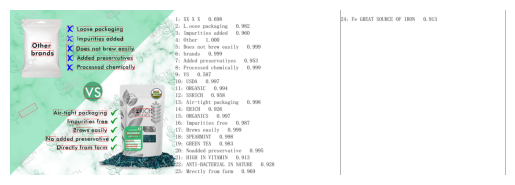

In [6]:
# Save the OCR result
save_ocr(img_url, out_path, result, font)

In [ ]:
print(result)

[[[[[364.0, 386.0], [376.0, 386.0], [376.0, 419.0], [364.0, 419.0]], ("ZRDA'", 0.8303024172782898)], [[[392.0, 388.0], [403.0, 388.0], [403.0, 399.0], [392.0, 399.0]], (':', 0.9285383820533752)], [[[446.0, 386.0], [506.0, 389.0], [505.0, 404.0], [446.0, 402.0]], ('11180', 0.5826712846755981)], [[[537.0, 388.0], [553.0, 388.0], [553.0, 425.0], [537.0, 425.0]], ('ZRDA', 0.8889359831809998)], [[[363.0, 516.0], [375.0, 516.0], [375.0, 578.0], [363.0, 578.0]], ('Qty./Serving', 0.9462711215019226)], [[[445.0, 519.0], [509.0, 519.0], [509.0, 539.0], [445.0, 539.0]], ('EEEE', 0.562947154045105)], [[[537.0, 517.0], [553.0, 517.0], [553.0, 580.0], [537.0, 580.0]], ('Qty./Serving', 0.9584558010101318)], [[[582.0, 518.0], [596.0, 518.0], [596.0, 547.0], [582.0, 547.0]], ('600', 0.5600946545600891)], [[[611.0, 516.0], [624.0, 518.0], [620.0, 550.0], [606.0, 548.0]], ('6600', 0.944198727607727)], [[[342.0, 542.0], [361.0, 542.0], [361.0, 923.0], [342.0, 923.0]], ('Serving Size:1 Tablet (0.709 gEach 

In [10]:
text_confidence_list

[('XX X X', 0.6981387734413147),
 ('L.oose packaging', 0.981829822063446),
 ('Impurities added', 0.9600088596343994),
 ('Other', 0.9998172521591187),
 ('Does not brew easily', 0.9991700053215027),
 ('brands', 0.998588502407074),
 ('Added preservatiyes', 0.952968418598175),
 ('Processed chemically', 0.9985215067863464),
 ('VS', 0.586962103843689),
 ('USDA', 0.9974968433380127),
 ('ORGANIC', 0.9942489862442017),
 ('SSRICH', 0.9584305882453918),
 ('Air-tight packaging', 0.9976540803909302),
 ('ERICH', 0.926368236541748),
 ('ORGANICS', 0.9968599081039429),
 ('Impurities free', 0.9865633249282837),
 ('Brews easily', 0.9994969964027405),
 ('SPEARMINT', 0.9982573390007019),
 ('GREEN TEA', 0.9825332164764404),
 ('Noadded preservative', 0.994583785533905),
 ('HIGH IN VITAMIN', 0.9125867486000061),
 ('ANTI-BACTERIAL IN NATURE', 0.9284980893135071),
 ('Mrectly from farm', 0.9687904119491577),
 ('Fe GREAT SOURCE OF IRON', 0.9132993817329407)]